In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0067.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0153.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0105.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0018.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0050.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0029.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0195.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0051.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0074.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0142.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0149.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0121.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0194.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0003.png
/kaggl

In [1]:
import numpy as np
from PIL import Image
import os
from random import randint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,LambdaCallback
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation


2024-08-02 11:03:33.521578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 11:03:33.521683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 11:03:33.790776: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
lookup = {}
reverselookup = {}
count = 0

for gesture_dir in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
    if not gesture_dir.startswith('.'):  # Ignore hidden files/directories
        lookup[gesture_dir] = count
        reverselookup[count] = gesture_dir
        count += 1

print("Lookup Dictionary:")
print(lookup)

Lookup Dictionary:
{'02_l': 0, '04_fist_moved': 1, '09_c': 2, '10_down': 3, '06_index': 4, '08_palm_moved': 5, '07_ok': 6, '05_thumb': 7, '01_palm': 8, '03_fist': 9}


In [6]:
x_data = []
y_data = []
datacount = 0

for i in range(10):  
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'):  
            count = 0 
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/'):
                
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L')
               
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr)
                count += 1
            y_values = np.full((count, 1), lookup[j])
            y_data.extend(y_values)
            datacount += count

x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) 

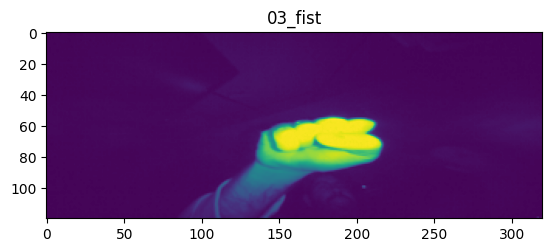

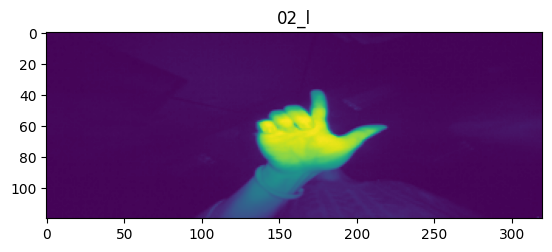

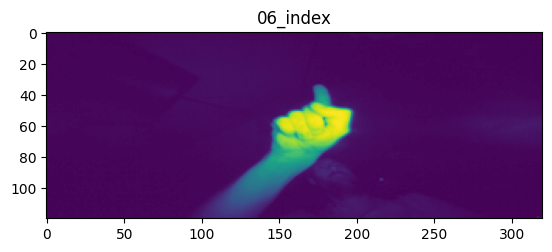

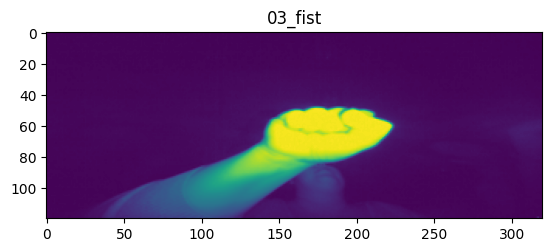

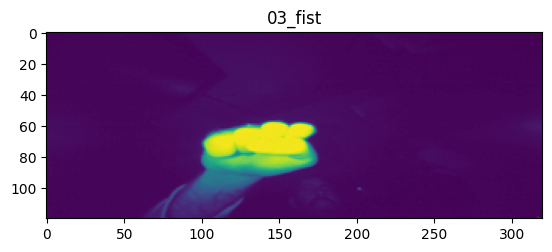

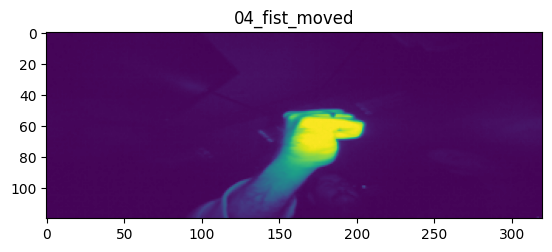

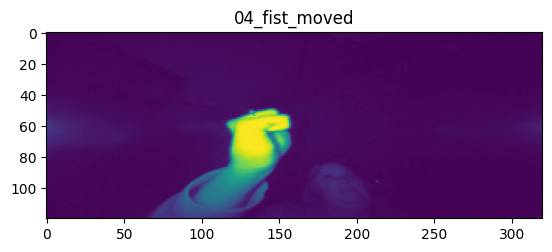

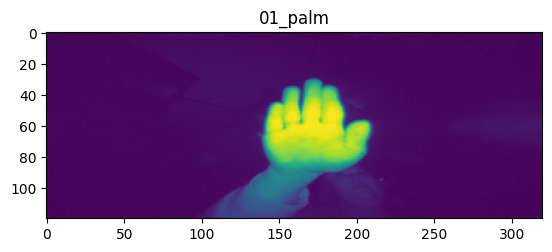

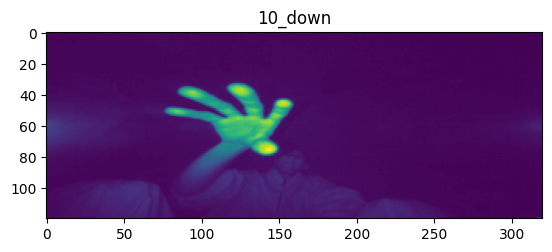

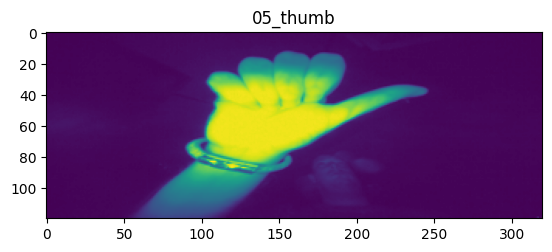

In [7]:
from random import randint
import matplotlib.pyplot as plt


num_images = 10
num_samples = len(x_data)

for _ in range(num_images):
    index = randint(0, num_samples - 1)  
    plt.imshow(x_data[index])  
    plt.title(reverselookup[y_data[index, 0]])  
    plt.show()

In [8]:
# Preprocess data
x_data = x_data.reshape((x_data.shape[0], 120, 320, 1))
x_data.shape

(20000, 120, 320, 1)

In [9]:
x_data /= 255
x_data[0]

array([[[0.02352941],
        [0.01960784],
        [0.01960784],
        ...,
        [0.01960784],
        [0.01960784],
        [0.01960784]],

       [[0.02352941],
        [0.01960784],
        [0.01960784],
        ...,
        [0.01960784],
        [0.01568628],
        [0.01960784]],

       [[0.02352941],
        [0.02352941],
        [0.01960784],
        ...,
        [0.01960784],
        [0.01960784],
        [0.01960784]],

       ...,

       [[0.02352941],
        [0.01960784],
        [0.01960784],
        ...,
        [0.02352941],
        [0.02352941],
        [0.01960784]],

       [[0.01960784],
        [0.01960784],
        [0.02352941],
        ...,
        [0.01568628],
        [0.01960784],
        [0.01960784]],

       [[0.01960784],
        [0.02352941],
        [0.01960784],
        ...,
        [0.10980392],
        [0.03137255],
        [0.03921569]]], dtype=float32)

In [18]:
y_data = to_categorical(y_data)
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
# Split data into training, validation, and test sets
x_train, x_further, y_train, y_further = train_test_split(x_data, y_data, test_size=0.2)
x_validate, x_test, y_validate, y_test = train_test_split(x_further, y_further, test_size=0.5)

In [20]:
# Define model architecture
model = Sequential()
model.add(Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 58, 158, 32)    │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 18, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       737,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 794,954 (3.03 MB)

 Trainable params: 794,954 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

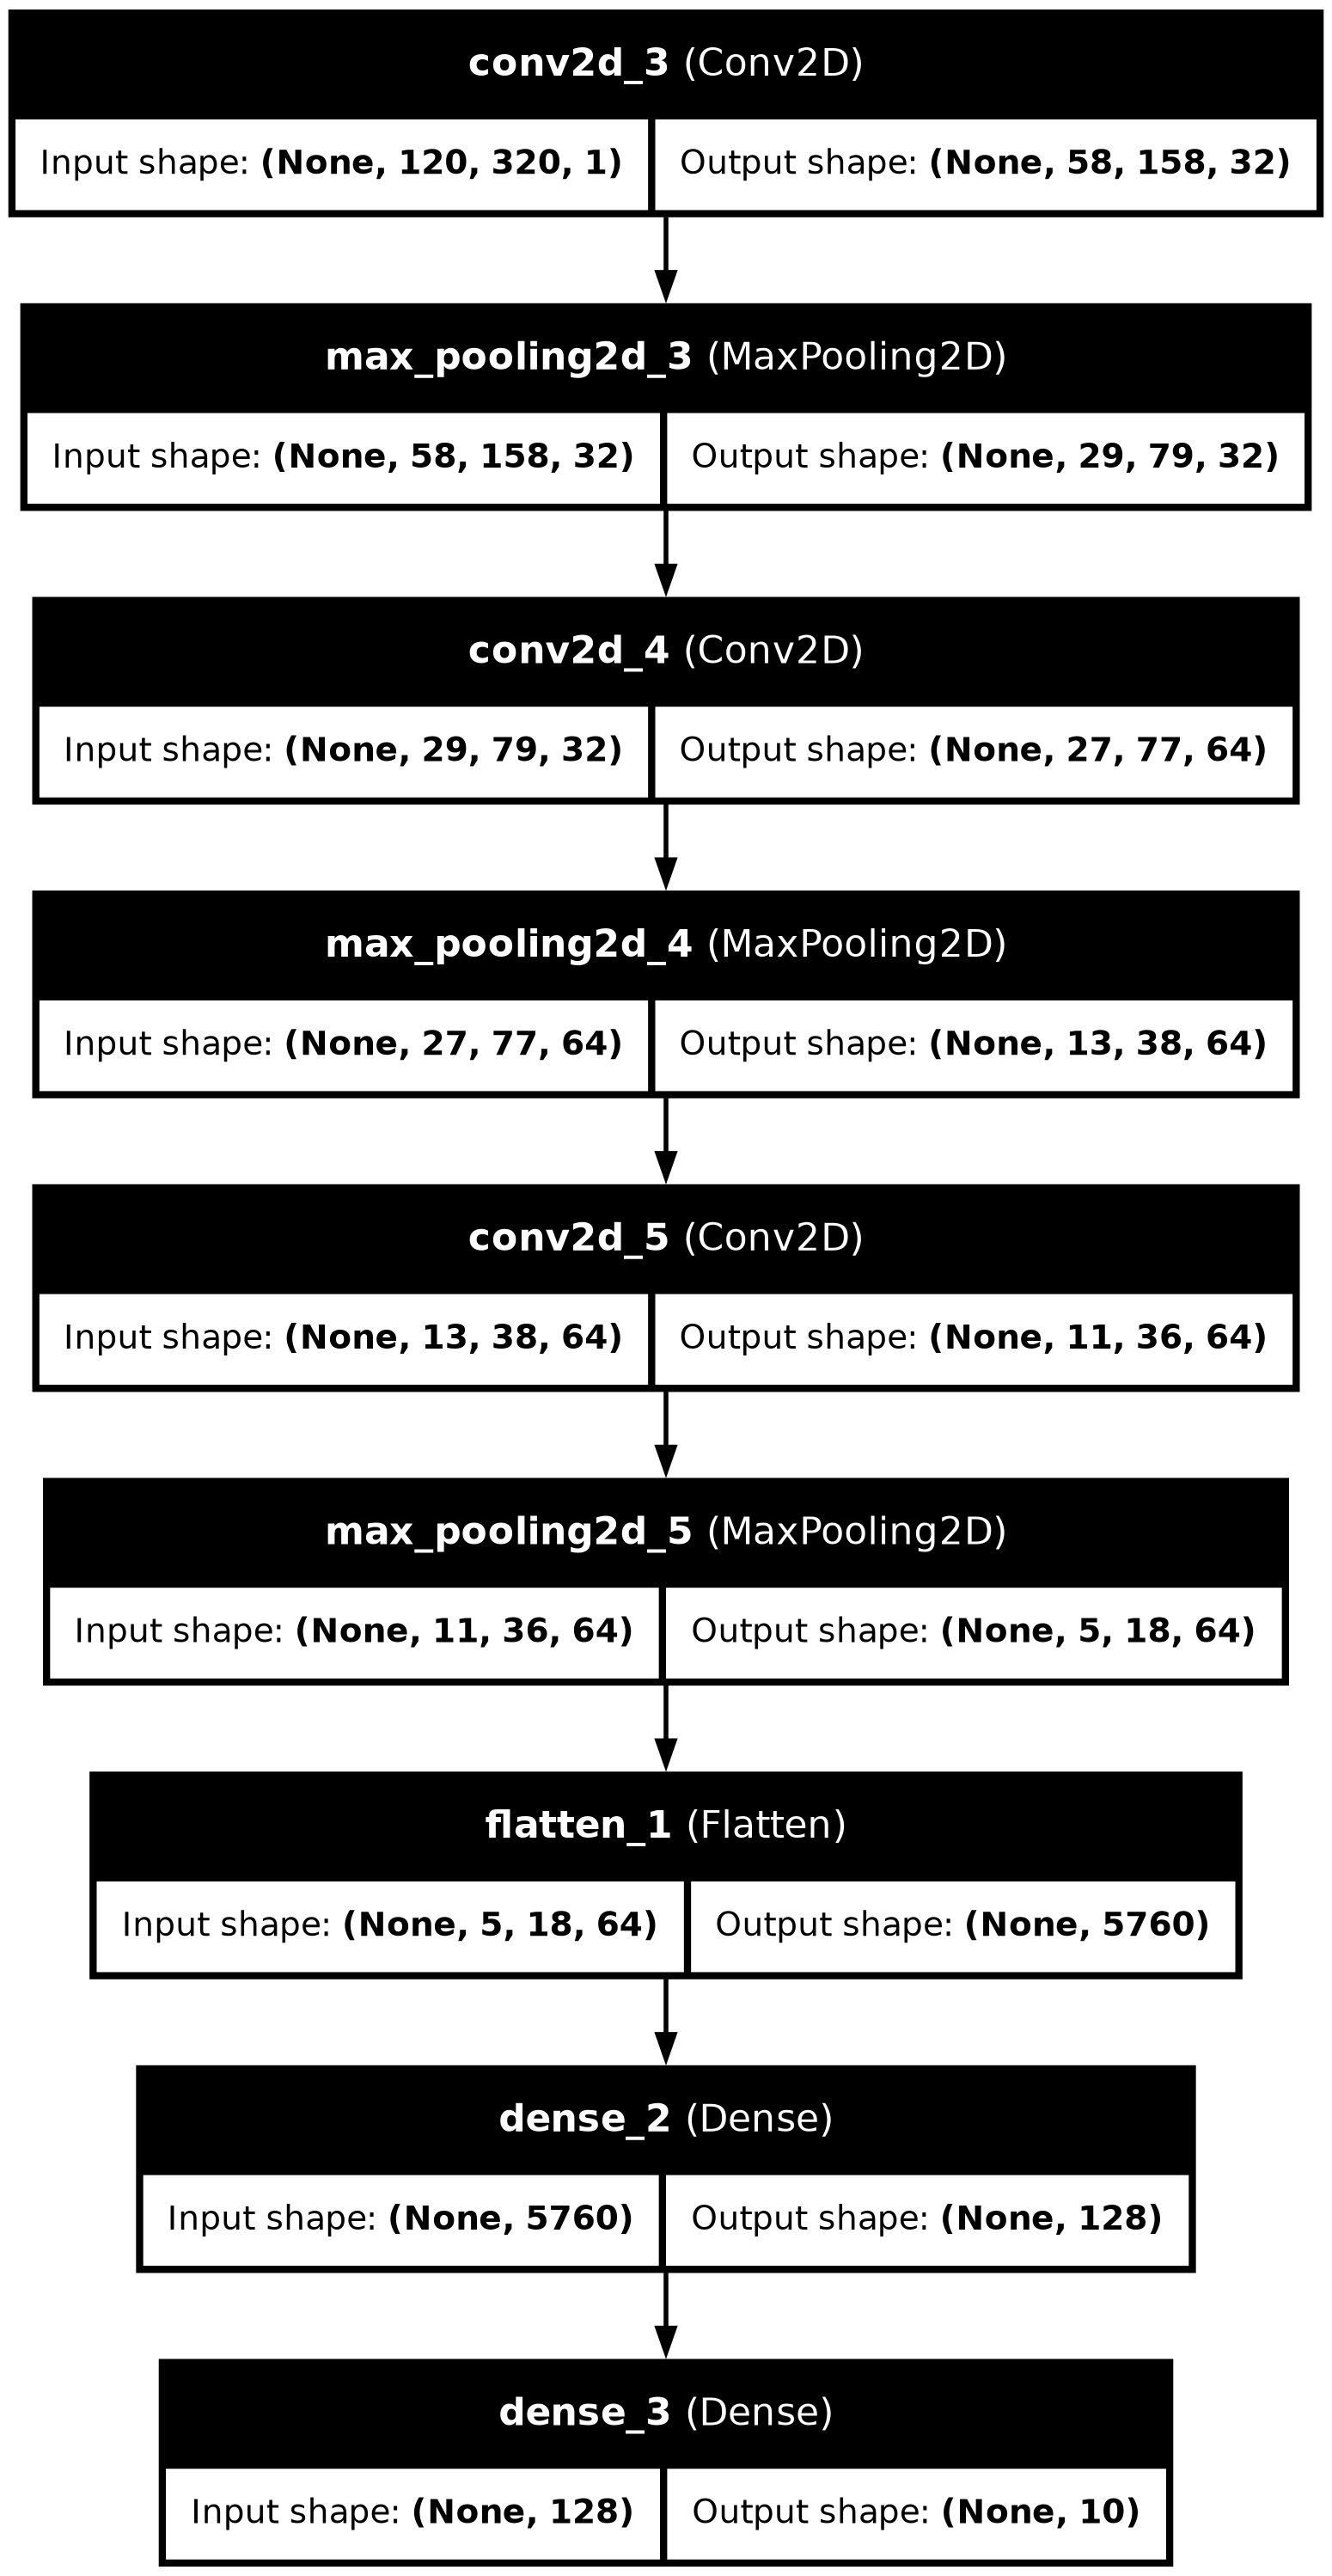

In [22]:
from keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [23]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint, LambdaCallback

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Define model checkpoint callback to save best model weights
model_checkpoint = ModelCheckpoint('best_model_weights.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train model with all callbacks
history = model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=1, 
                    validation_data=(x_validate, y_validate), 
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
  5/125 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.1117 - loss: 2.2846 

I0000 00:00:1722597098.245324     143 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722597098.266012     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6569 - loss: 0.9909

W0000 00:00:1722597103.506257     143 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.99150, saving model to best_model_weights.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.6585 - loss: 0.9864 - val_accuracy: 0.9915 - val_loss: 0.0268
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9938 - loss: 0.0235
Epoch 2: val_accuracy improved from 0.99150 to 0.99950, saving model to best_model_weights.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9938 - loss: 0.0235 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9984 - loss: 0.0069
Epoch 3: val_accuracy improved from 0.99950 to 1.00000, saving model to best_model_weights.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9984 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9992 - loss: 0.0041
Epoch 4: val_accuracy did not improve from 1.00000
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step

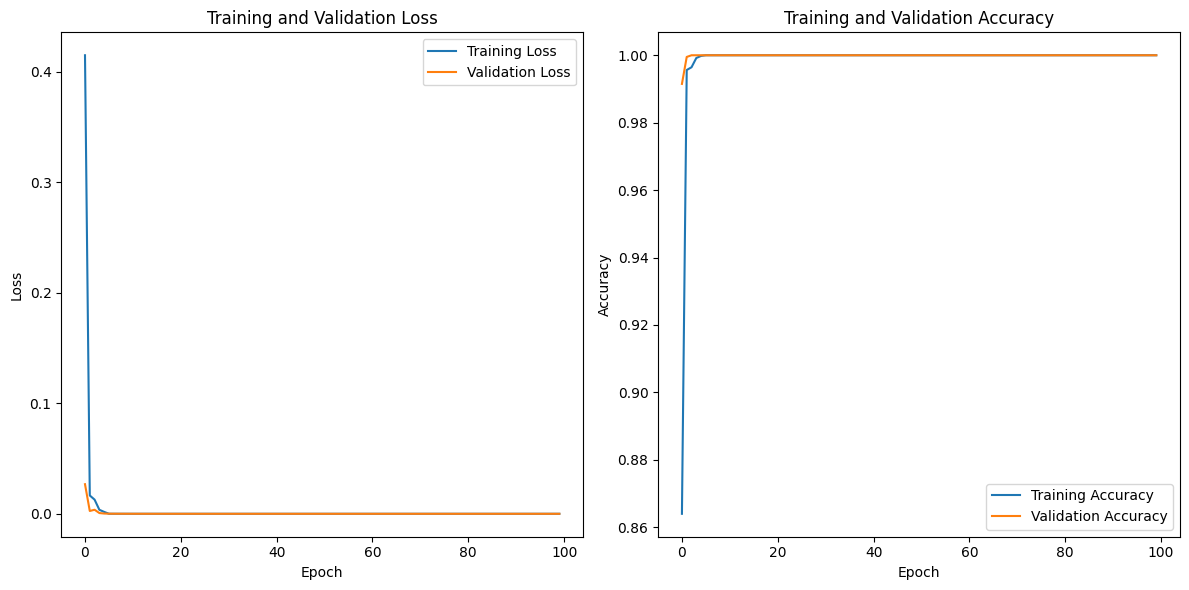

In [26]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Evaluate model on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9999 - loss: 1.4294e-04
Test Loss: 0.0007807562942616642
Test Accuracy: 0.9994999766349792
